In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [5]:
# read data

dataset = pd.read_csv('data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
# get 9 columns of features we want

X = dataset[['radius_mean', 'texture_mean', 'perimeter_mean', 
       'area_mean', 'smoothness_mean', 'concavity_mean', 
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.35140,0.15200,0.2397,0.07016


In [7]:
# diagnosis of every patient, change malignant to 1 and benign to 0
y = dataset['diagnosis']
y = np.array(y)
y = np.where(y == 'M', 1, 0)
    
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# randomly split 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
338,10.050,17.53,64.41,310.8,0.10070,0.02511,0.01775,0.1890,0.06331
427,10.800,21.98,68.79,359.9,0.08801,0.03614,0.01404,0.2016,0.05977
406,16.140,14.86,104.30,800.0,0.09495,0.05500,0.04528,0.1735,0.05875
96,12.180,17.84,77.79,451.1,0.10450,0.02490,0.02941,0.1900,0.06635
490,12.250,22.44,78.18,466.5,0.08192,0.01714,0.01261,0.1544,0.05976
...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.08020,0.05843,0.1550,0.04996
9,12.460,24.04,83.97,475.9,0.11860,0.22730,0.08543,0.2030,0.08243
359,9.436,18.32,59.82,278.6,0.10090,0.02710,0.01406,0.1506,0.06959
192,9.720,18.22,60.73,288.1,0.06950,0.00000,0.00000,0.1653,0.06447


In [9]:
# preprocessing, standardizes each column of input X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA

# pca function on training and test sets
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [11]:
from sklearn.linear_model import LogisticRegression

# use logistic regression to predict 1 or 0

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = classifier.predict(X_test)

[[64  3]
 [ 5 42]]


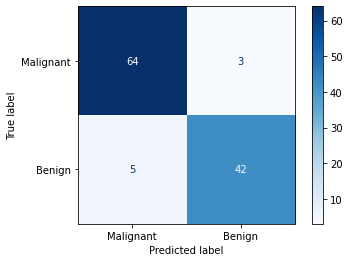

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print (cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
disp.plot(cmap="Blues")

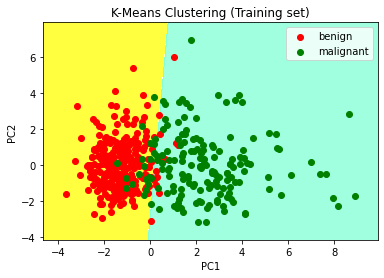

In [18]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    if (j==0):
        l = "benign"
    else:
        l= "malignant"
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=l)

plt.title('K-Means Clustering (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

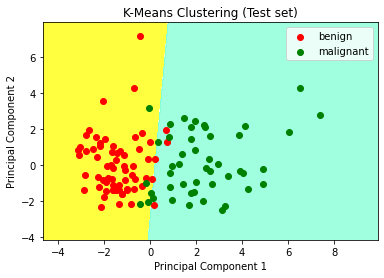

In [17]:
X_set, y_set = X_test, y_test

#X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               #stop=X_set[:, 0].max() + 1, step=0.01),
                    # np.arange(start=X_set[:, 1].min() - 1,
                              # stop=X_set[:, 1].max() + 1, step=0.01))

#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                    #                              X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
          #   cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

X_set1, y_set1 = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set1[:, 0].min() - 1,
                               stop=X_set1[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set1[:, 1].min() - 1,
                               stop=X_set1[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    if (j==0):
        l = "benign"
    else:
        l= "malignant"
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=l)


# title for scatter plot
plt.title('K-Means Clustering (Test set)')
plt.xlabel('Principal Component 1')  # for Xlabel
plt.ylabel('Principal Component 2')  # for Ylabel
plt.legend()
# show scatter plot
plt.show()

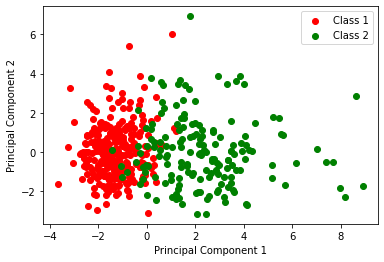

In [16]:
# plot the first two principal components with labels
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()